# SOLEMNE 1 MINERÍA DE DATOS

En este trabajo se realizará un análisis de datos sobre el COVID-19 y su impacto, para ello se utilizará un conjunto de datos públicos relacionados con el COVID-19 disponibles en BigQuery en la página de Google Cloud Platform

## Desarrollo de la Actividad

El primer paso a realizar es utlizar un paquete de python para así utilizar Bigquery, el cual corresponde al escrito en la siguiente línea de código. Además, se definirá un "cliente" el cuál nos permitirá recopilar la información adquirida por la base de datos.

In [2]:
from google.cloud import bigquery

client = bigquery.Client(project='pegasus-418020')

El nombre de pegasus corresponde al de un proyecto creado en Google Cloud Platform, en el cual mediante él se accederá a la base de datos que se utilizará.

El conjunto de datos públicos utilizado corresponde a la respuesta del gobierno frente a la pandemia debido al COVID-19, perteneciente a la Universidad de Oxford. Este set de datos es bastante interesante debido a que Inglaterra fue uno de los países que a pesar de presentar un rápido aumento de casos de COVID-19 a inicios del año 2020, se convirtió en uno de los primeros países que mantuvo un control de esta epidemia, conviertiéndose en el primer país del mundo en aprobar la vacuna Pfizer/BioNTech, empezar una vacuanción masiva y desarrollar la vacuna Oxford-AstraZeneca (todos estos eventos mencionados anteriormente se dieron a lugar en diciembre del año 2020). Debido a estos eventos y al involucramiento de la Universidad de Oxford en el desarrollo de una vacuna que hizo frente a la pandemia, es que se utilizarán estos datos.  

A continuación se presenta el código que permitirá acceder a los datos proporcionados por la Universidad de Oxford.

In [3]:
dataset_ref = client.dataset("covid19_govt_response", project="bigquery-public-data")

dataset = client.get_dataset(dataset_ref)

In [4]:
# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

oxford_policy_tracker


In [5]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("oxford_policy_tracker")

# API request - fetch the table
table = client.get_table(table_ref)

In [6]:
table.schema

[SchemaField('country_name', 'STRING', 'NULLABLE', None, 'Name of the country', (), None),
 SchemaField('alpha_3_code', 'STRING', 'NULLABLE', None, '3-letter alpha code abbreviation of the country/region. See `bigquery-public-data.utility_us.country_code_iso` for more details', (), None),
 SchemaField('region_name', 'STRING', 'NULLABLE', None, 'Name of the region within the country', (), None),
 SchemaField('region_code', 'STRING', 'NULLABLE', None, 'Code of the region within the country', (), None),
 SchemaField('date', 'DATE', 'NULLABLE', None, 'Date of the measured policy action status', (), None),
 SchemaField('school_closing', 'STRING', 'NULLABLE', None, 'C1 - Ordinal scale record closings of schools and universities; 0 - No measures 1 - recommend closing 2 - Require closing (only some levels or categories eg just high school or just public schools) 3 - Require closing all levels No data - blank', (), None),
 SchemaField('school_closing_flag', 'STRING', 'NULLABLE', None, 'Are C1 a

In [31]:
client.list_rows(table, max_results=5).to_dataframe()

,country_name,alpha_3_code,region_name,region_code,date,school_closing,school_closing_flag,school_closing_notes,workplace_closing,workplace_closing_flag,...,contact_tracing_notes,emergency_healthcare_investment,emergency_healthcare_investment_notes,vaccine_investment,vaccine_investment_notes,misc_wildcard,misc_wildcard_notes,confirmed_cases,deaths,stringency_index
0,Aruba,ABW,None,None,2021-09-07,2.0,1.0,None,None,None,...,None,NaN,None,NaN,None,None,None,14913,151,37.96
1,Aruba,ABW,None,None,2021-09-08,None,None,None,None,None,...,None,NaN,None,NaN,None,None,None,14955,153,37.96
2,Aruba,ABW,None,None,2021-09-09,None,None,None,None,None,...,None,NaN,None,NaN,None,None,None,14991,154,37.96
3,Afghanistan,AFG,None,None,2021-08-25,None,None,None,None,None,...,None,NaN,None,NaN,None,None,None,152722,7090,NaN
4,Afghanistan,AFG,None,None,2021-08-26,None,None,None,None,None,...,None,NaN,None,NaN,None,None,None,152822,7093,NaN


In [8]:
client.list_rows(table, selected_fields=table.schema[:25], max_results=10).to_dataframe()

,country_name,alpha_3_code,region_name,region_code,date,school_closing,school_closing_flag,school_closing_notes,workplace_closing,workplace_closing_flag,...,restrictions_on_gatherings_flag,restrictions_on_gatherings_notes,close_public_transit,close_public_transit_flag,close_public_transit_notes,stay_at_home_requirements,stay_at_home_requirements_flag,stay_at_home_requirements_notes,restrictions_on_internal_movement,restrictions_on_internal_movement_flag
0,Aruba,ABW,None,None,2021-09-07,2.0,1.0,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Aruba,ABW,None,None,2021-09-08,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Aruba,ABW,None,None,2021-09-09,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Afghanistan,AFG,None,None,2021-08-25,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Afghanistan,AFG,None,None,2021-08-26,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,Afghanistan,AFG,None,None,2021-08-27,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,Afghanistan,AFG,None,None,2021-08-28,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Afghanistan,AFG,None,None,2021-08-29,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,Afghanistan,AFG,None,None,2021-08-30,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,Afghanistan,AFG,None,None,2021-08-31,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [9]:
query = """
    SELECT *
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    ORDER BY date DESC 
    LIMIT 10
"""

# Ejecuta la consulta y obtén los resultados
query_job = client.query(query)

# Imprime los resultados
for row in query_job:
    print(row)

Row(('Argentina', 'ARG', None, None, datetime.date(2021, 9, 10), None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 75.93), {'country_name': 0, 'alpha_3_code': 1, 'region_name': 2, 'region_code': 3, 'date': 4, 'school_closing': 5, 'school_closing_flag': 6, 'school_closing_notes': 7, 'workplace_closing': 8, 'workplace_closing_flag': 9, 'workplace_closing_notes': 10, 'cancel_public_events': 11, 'cancel_public_events_flag': 12, 'cancel_public_events_notes': 13, 'restrictions_on_gatherings': 14, 'restrictions_on_gatherings_flag': 15, 'restrictions_on_gatherings_notes': 16, 'close_public_transit': 17, 'close_public_transit_flag': 18, 'close_public_transit_notes': 19, 'stay_at_home_requirements': 20, 'stay_at_home_requirements_flag': 21, 'stay_at_home_requirements_

In [10]:
query = """
    SELECT *
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE EXTRACT(YEAR FROM date) = 2020
    ORDER BY date DESC
    LIMIT 10
"""

# Ejecuta la consulta y obtén los resultados
query_job = client.query(query)

# Imprime los resultados
for row in query_job:
    print(row)

Row(('Brazil', 'BRA', 'Santa Catarina', 'BR_SC', datetime.date(2020, 12, 31), None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 492583, 5253, None), {'country_name': 0, 'alpha_3_code': 1, 'region_name': 2, 'region_code': 3, 'date': 4, 'school_closing': 5, 'school_closing_flag': 6, 'school_closing_notes': 7, 'workplace_closing': 8, 'workplace_closing_flag': 9, 'workplace_closing_notes': 10, 'cancel_public_events': 11, 'cancel_public_events_flag': 12, 'cancel_public_events_notes': 13, 'restrictions_on_gatherings': 14, 'restrictions_on_gatherings_flag': 15, 'restrictions_on_gatherings_notes': 16, 'close_public_transit': 17, 'close_public_transit_flag': 18, 'close_public_transit_notes': 19, 'stay_at_home_requirements': 20, 'stay_at_home_requirements_flag': 21, 'stay_at_home

In [11]:
query = """
    SELECT *
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    ORDER BY cancel_public_events
    LIMIT 10
"""

# Ejecuta la consulta y obtén los resultados
query_job = client.query(query)

# Imprime los resultados
for row in query_job:
    print(row)

Row(('Aruba', 'ABW', None, None, datetime.date(2021, 9, 7), '2.0', '1.0', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, '1.0', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 14913, 151, 37.96), {'country_name': 0, 'alpha_3_code': 1, 'region_name': 2, 'region_code': 3, 'date': 4, 'school_closing': 5, 'school_closing_flag': 6, 'school_closing_notes': 7, 'workplace_closing': 8, 'workplace_closing_flag': 9, 'workplace_closing_notes': 10, 'cancel_public_events': 11, 'cancel_public_events_flag': 12, 'cancel_public_events_notes': 13, 'restrictions_on_gatherings': 14, 'restrictions_on_gatherings_flag': 15, 'restrictions_on_gatherings_notes': 16, 'close_public_transit': 17, 'close_public_transit_flag': 18, 'close_public_transit_notes': 19, 'stay_at_home_requirements': 20, 'stay_at_home_requirements_flag': 21, 'stay_at_home_requirements_no

In [18]:
import pandas as pd

# Define tu consulta SQL
query = """
    SELECT country_name, date, confirmed_cases, deaths, stringency_index
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Chile'
    LIMIT 40
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Visualiza las primeras filas del DataFrame
print(df)


   country_name        date  confirmed_cases  deaths  stringency_index
0         Chile  2021-09-06          1641526   37108             63.43
1         Chile  2021-09-07          1641791   37115             63.43
2         Chile  2021-09-08          1642146   37122             63.43
3         Chile  2021-09-09          1642646   37159             63.43
4         Chile  2020-02-23                2    <NA>              0.00
5         Chile  2020-02-24                2    <NA>              0.00
6         Chile  2020-02-25                2    <NA>              0.00
7         Chile  2020-02-26                2    <NA>              0.00
8         Chile  2020-02-27                2    <NA>              0.00
9         Chile  2020-02-28                2    <NA>              0.00
10        Chile  2020-02-29                2    <NA>              0.00
11        Chile  2020-03-01                9    <NA>              0.00
12        Chile  2020-03-02                9    <NA>              0.00
13    

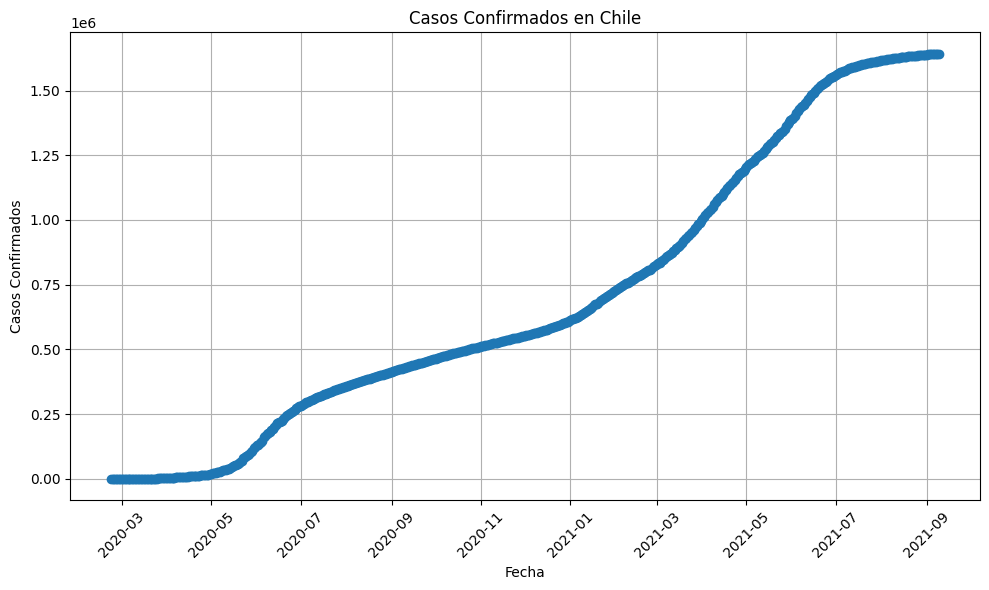

In [131]:
import matplotlib.pyplot as plt

# Define tu consulta SQL con la condición WHERE
query = """
    SELECT date, confirmed_cases
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Chile'
    ORDER BY date DESC
    
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Convierte la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'])

# Ordena los datos por fecha
df = df.sort_values(by='date')

# Crea el gráfico lineal
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['confirmed_cases'], marker='o', linestyle='-')
plt.title('Casos Confirmados en Chile')
plt.xlabel('Fecha')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


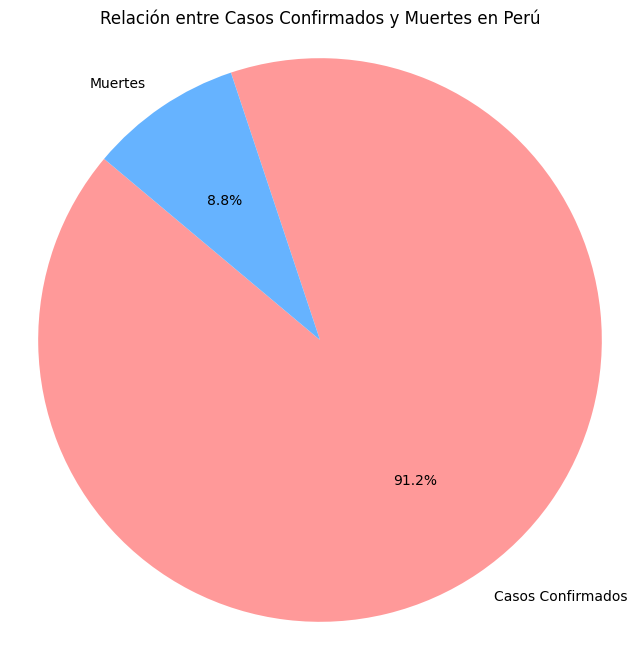

In [46]:
# Define tu consulta SQL con la condición WHERE
query = """
    SELECT SUM(confirmed_cases) AS total_confirmed_cases, SUM(deaths) AS total_deaths
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Peru'
    LIMIT 1
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Obtén los totales de casos confirmados y muertes
total_confirmed_cases = df['total_confirmed_cases'].iloc[0]
total_deaths = df['total_deaths'].iloc[0]

# Crea los datos para el gráfico de pastel
sizes = [total_confirmed_cases, total_deaths]
labels = ['Casos Confirmados', 'Muertes']
colors = ['#ff9999', '#66b3ff']

# Crea el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Relación entre Casos Confirmados y Muertes en Perú')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


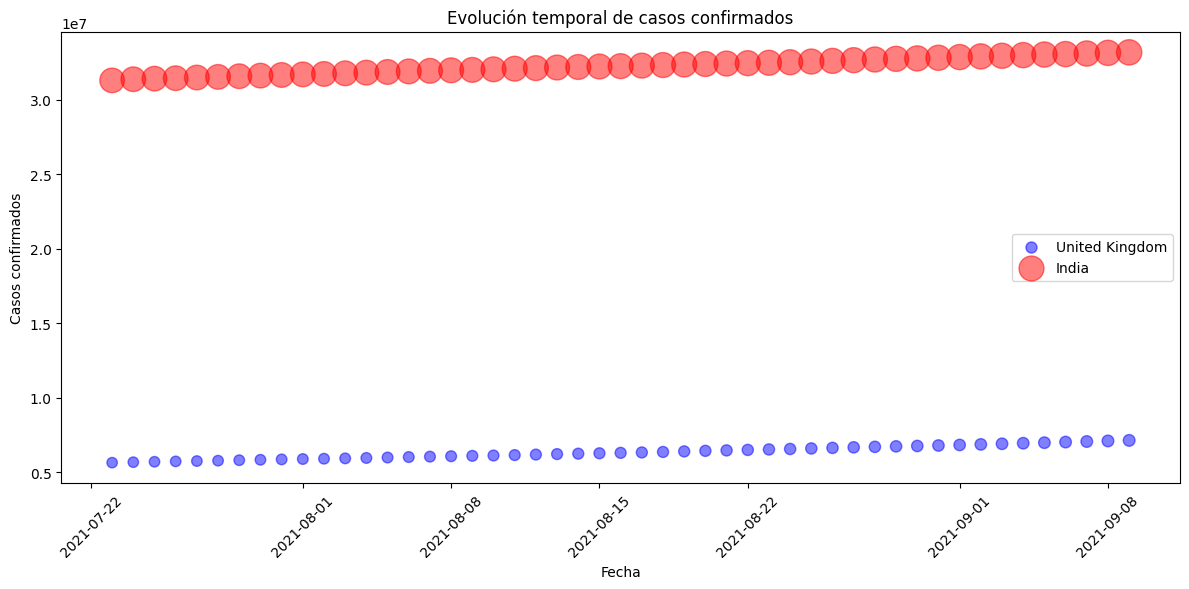

In [134]:
query = """
    SELECT country_name, date, confirmed_cases
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name IN ('United Kingdom', 'India')
    ORDER BY date DESC
    LIMIT 300
    
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Filtrar los datos para los países seleccionados
df_filtered = df[df['country_name'].isin(['United Kingdom', 'India'])]

# Agrupar los datos por país y fecha
grouped = df_filtered.groupby(['country_name', 'date']).agg({'confirmed_cases': 'max'}).reset_index()

# Obtener los datos para cada país
uk_data = grouped[grouped['country_name'] == 'United Kingdom']
i_data = grouped[grouped['country_name'] == 'India']

# Ajustar el tamaño de las burbujas
bubble_size_uk = uk_data['confirmed_cases'] * 0.00001
bubble_size_i = i_data['confirmed_cases'] * 0.00001

# Graficar los datos como un gráfico de burbujas
plt.figure(figsize=(12, 6))

plt.scatter(uk_data['date'], uk_data['confirmed_cases'], s=bubble_size_uk, alpha=0.5, c='blue', label='United Kingdom')
plt.scatter(i_data['date'], i_data['confirmed_cases'], s=bubble_size_i, alpha=0.5, c='red', label='India')

plt.title('Evolución temporal de casos confirmados')
plt.xlabel('Fecha')
plt.ylabel('Casos confirmados')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

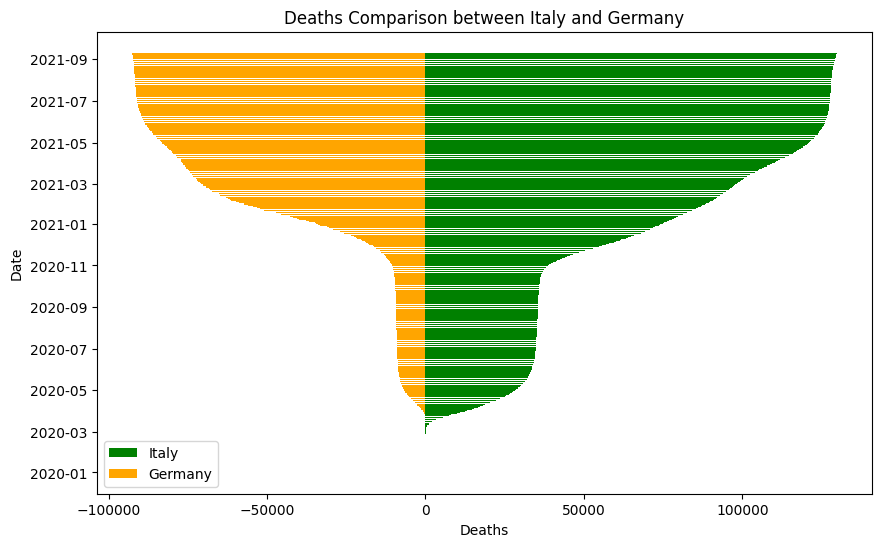

In [130]:
query = """
    SELECT country_name, date, deaths
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name IN ('Italy', 'Germany')
    ORDER BY date DESC
    
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Filtra los datos para Italia y Alemania
italy_data = df[df['country_name'] == 'Italy']
germany_data = df[df['country_name'] == 'Germany']

# Agrupa los datos por fecha y calcula la suma de muertes para cada país
italy_deaths = italy_data.groupby('date')['deaths'].sum()
germany_deaths = germany_data.groupby('date')['deaths'].sum()

# Crea el gráfico de pirámide
plt.figure(figsize=(10, 6))

# Grafica los datos de Italia
plt.barh(italy_deaths.index, italy_deaths.values, color='green', label='Italy')

# Grafica los datos de Alemania
plt.barh(germany_deaths.index, -germany_deaths.values, color='orange', label='Germany')

# Configuración del gráfico
plt.xlabel('Deaths')
plt.ylabel('Date')
plt.title('Deaths Comparison between Italy and Germany')
plt.legend()

# Muestra el gráfico
plt.show()

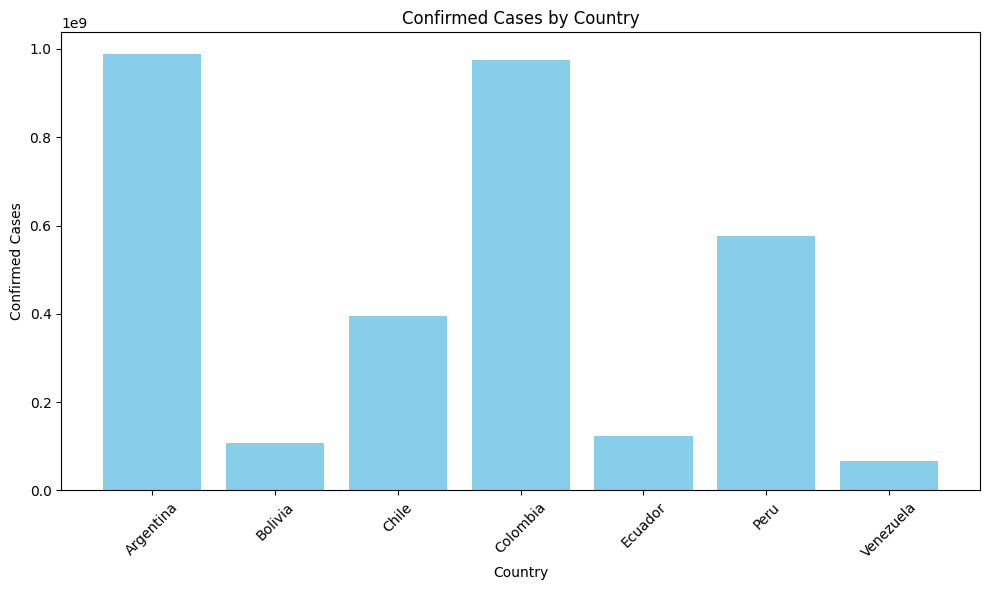

In [158]:
query = """
    SELECT country_name, SUM(confirmed_cases) AS total_confirmed_cases
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name IN ('Argentina', 'Bolivia', 'Chile', 'Colombia', 'Ecuador', 'Peru', 'Venezuela')
    GROUP BY country_name
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Configura el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df['country_name'], df['total_confirmed_cases'], color='skyblue')

# Configuración del gráfico
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases by Country')

# Muestra el gráfico
plt.xticks(rotation=45)  # Rotación de los nombres de los países en el eje X para mejor visualización
plt.tight_layout()  # Ajusta el diseño del gráfico para evitar superposiciones
plt.show()